# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

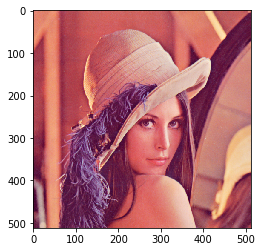

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

IMG_FILE = "Part01/lena.png"


# 以彩色圖片的方式載入
img = cv2.imread(IMG_FILE, cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 上下左右翻轉圖片

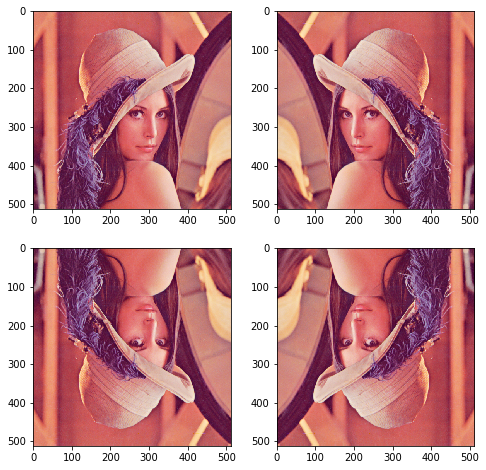

In [7]:
# 水平翻轉 (horizontal)
img_hflip = cv2.flip(img, 1)

# 垂直翻轉 (vertical)
img_vflip =  cv2.flip(img, 0)

# 水平 + 垂直翻轉
img_hvflip = cv2.flip(img, -1)

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(222)
plt.imshow(cv2.cvtColor(img_hflip, cv2.COLOR_BGR2RGB))

plt.subplot(223)
plt.imshow(cv2.cvtColor(img_vflip, cv2.COLOR_BGR2RGB))


plt.subplot(224)
plt.imshow(cv2.cvtColor(img_hvflip, cv2.COLOR_BGR2RGB))

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

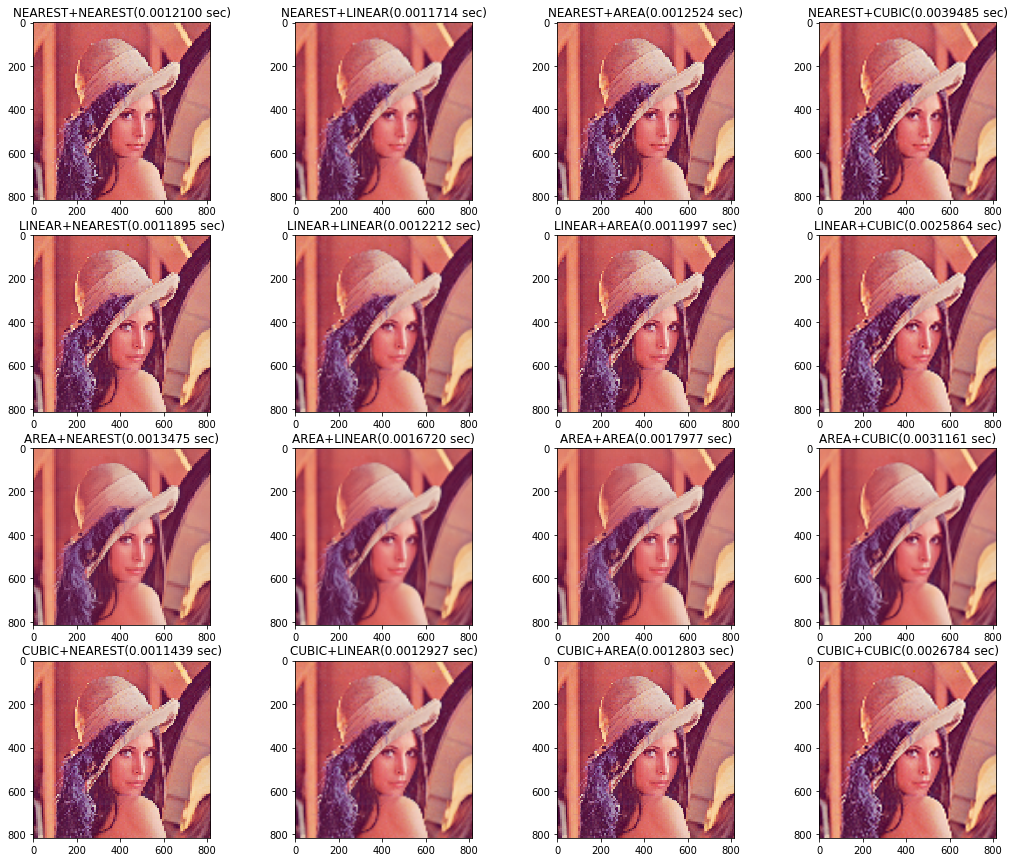

In [64]:
interpolations={"NEAREST":cv2.INTER_NEAREST, "LINEAR":cv2.INTER_LINEAR, "AREA":cv2.INTER_AREA, "CUBIC":cv2.INTER_CUBIC}

plt.figure(figsize=(18,15))

idx = 0
for k in interpolations.keys():
    for l in interpolations.keys():
        idx = idx+1
        plt.subplot(4,4,idx)
        start_time = time.time()
        # 將圖片縮小成原本的 20%, 然後放大800%
        m = cv2.resize(img, None, fx=0.2, fy=0.2, interpolation=interpolations[k])
        resized_img = cv2.resize(m, None, fx=8, fy=8, interpolation=interpolations[l])    
        end_time = time.time()
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        plt.title("{}+{}({:.7f} sec)".format(k, l, end_time-start_time))

## 平移幾何轉換

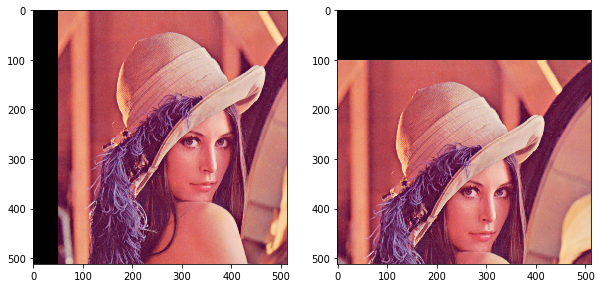

In [77]:
# 設定 translation transformation matrix
# x 平移 50 pixel

plt.figure(figsize=(10,10))
M = np.array([[1,0,50],
              [0,1,0]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
plt.subplot(121)
plt.imshow(cv2.cvtColor(shift_img, cv2.COLOR_BGR2RGB))

# y 平移 100 pixel
M = np.array([[1,0,0],
              [0,1,100]], dtype=np.float32)

shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
plt.subplot(122)
plt.imshow(cv2.cvtColor(shift_img, cv2.COLOR_BGR2RGB))
